In [1]:
import torch
from models.resnet import load_resnet_model
from models.swin3D import load_swin3d

from utils.train import train_model
from utils.dataloader import create_dataloader, create_dataset

from utils.utils import sorted_file_paths
import torch.nn as nn
import torch.optim as optim

import seaborn as sns
from matplotlib import pyplot as plt
from loss.balanced_MSE_loss import BMCLoss

2024-05-02 00:32:22.079172: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-02 00:32:22.079219: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-02 00:32:22.080041: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-02 00:32:22.086400: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-02 00:32:23.366091: W tensorflow/compiler/tf2

# Setting up common variables for all experiments

In [2]:
LR = 0.001
EPOCH = 30

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
train_files = sorted_file_paths('./data/records_location/train/')
val_files = sorted_file_paths('./data/records_location/val/')

train_dataset = create_dataset(train_files)
val_dataset = create_dataset(val_files)


train_loader = create_dataloader(train_dataset, 64)
val_loader = create_dataloader(val_dataset, 64)

training_labels = train_dataset.all_labels.numpy()

# Experiment 0: L2 loss Swin 3d

In [ ]:
ex = 'experiments/ex_0'
loss =  nn.MSELoss()
model = load_swin3d()
optimizer = optim.Adam(model.parameters(), LR)

train_model(model, loss, optimizer, [train_loader], [val_loader], device, ex, epochs=EPOCH)

# Experiment 1: L2 loss

In [3]:
ex = 'ex_1'
loss =  nn.MSELoss()
model = load_resnet_model('resnet50', num_classes=1)
optimizer = optim.Adam(model.parameters(), LR)

train_model(model, loss, optimizer, [train_loader], [val_loader], device, ex, epochs=EPOCH)

/opt/conda/envs/pytorch/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/envs/pytorch/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/30, Train Loss: 0.2880, Train R2: -0.4291, Train weighted MAE: 1.1318,Val Loss: 0.1096, Val R2: 0.4570, Val weighted MAE: 1.1503
Model saved as ex_1/checkpoint_epoch_1.pth
Epoch 2/30, Train Loss: 0.1116, Train R2: 0.4460, Train weighted MAE: 1.0442,Val Loss: 0.1462, Val R2: 0.2759, Val weighted MAE: 1.2562
Epoch 3/30, Train Loss: 0.1113, Train R2: 0.4477, Train weighted MAE: 0.9655,Val Loss: 0.1790, Val R2: 0.1135, Val weighted MAE: 1.2277
Epoch 4/30, Train Loss: 0.0986, Train R2: 0.5107, Train weighted MAE: 0.9203,Val Loss: 0.1323, Val R2: 0.3447, Val weighted MAE: 1.0084
Epoch 5/30, Train Loss: 0.0909, Train R2: 0.5490, Train weighted MAE: 0.8929,Val Loss: 0.1430, Val R2: 0.2920, Val weighted MAE: 0.9477
Epoch 6/30, Train Loss: 0.0801, Train R2: 0.6023, Train weighted MAE: 0.8584,Val Loss: 0.1229, Val R2: 0.3912, Val weighted MAE: 0.8284
Epoch 7/30, Train Loss: 0.0808, Train R2: 0.5990, Train weighted MAE: 0.8656,Val Loss: 0.1081, Val R2: 0.4646, Val weighted MAE: 1.0887
Mode

# Experiment 2: L3 loss

In [4]:
from weighted_L3_loss import L3Loss

ex = 'ex_2'
loss =  L3Loss()
model = load_resnet_model('resnet50', num_classes=1)
optimizer = optim.Adam(model.parameters(), LR)

train_model(model, loss, optimizer, [train_loader], [val_loader], device, ex, epochs=EPOCH)

/opt/conda/envs/pytorch/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/envs/pytorch/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/30, Train Loss: 0.6665, Train R2: -1.0174, Train weighted MAE: 1.4130,Val Loss: 0.1357, Val R2: 0.0314, Val weighted MAE: 1.3625
Model saved as ex_2/checkpoint_epoch_1.pth
Epoch 2/30, Train Loss: 0.1258, Train R2: 0.0733, Train weighted MAE: 1.3429,Val Loss: 0.0977, Val R2: 0.2533, Val weighted MAE: 1.2221
Model saved as ex_2/checkpoint_epoch_2.pth
Epoch 3/30, Train Loss: 0.0777, Train R2: 0.3540, Train weighted MAE: 1.1888,Val Loss: 0.0772, Val R2: 0.3834, Val weighted MAE: 0.9952
Model saved as ex_2/checkpoint_epoch_3.pth
Epoch 4/30, Train Loss: 0.0621, Train R2: 0.4531, Train weighted MAE: 1.1084,Val Loss: 0.0806, Val R2: 0.3839, Val weighted MAE: 0.9626
Epoch 5/30, Train Loss: 0.0555, Train R2: 0.4933, Train weighted MAE: 1.0476,Val Loss: 0.0750, Val R2: 0.4018, Val weighted MAE: 0.9645
Model saved as ex_2/checkpoint_epoch_5.pth
Epoch 6/30, Train Loss: 0.0506, Train R2: 0.5224, Train weighted MAE: 0.9902,Val Loss: 0.0693, Val R2: 0.4426, Val weighted MAE: 0.9106
Model saved

# Experiment 3: Weighted MSE with dense_weight model, alpha = 0.25

In [3]:
from weighted_MSE_loss import WeightedMSELoss
from dense_weight import DenseWeight

In [6]:
ex = 'ex_3'

dense_weight_model = DenseWeight(0.25)
dense_weight_model.fit(training_labels)
loss =  WeightedMSELoss(dense_weight_model)
model = load_resnet_model('resnet50', num_classes=1)
optimizer = optim.Adam(model.parameters(), LR)

train_model(model, loss, optimizer, [train_loader], [val_loader], device, ex, epochs=EPOCH)

/opt/conda/envs/pytorch/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/envs/pytorch/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/30, Train Loss: 0.2758, Train R2: -0.3343, Train weighted MAE: 1.1413,Val Loss: 0.1322, Val R2: 0.3989, Val weighted MAE: 1.1271
Model saved as ex_3/checkpoint_epoch_1.pth
Epoch 2/30, Train Loss: 0.1068, Train R2: 0.4921, Train weighted MAE: 1.0636,Val Loss: 0.1756, Val R2: 0.2111, Val weighted MAE: 1.3107
Epoch 3/30, Train Loss: 0.0963, Train R2: 0.5407, Train weighted MAE: 0.9641,Val Loss: 0.1472, Val R2: 0.3352, Val weighted MAE: 1.1433
Epoch 4/30, Train Loss: 0.0910, Train R2: 0.5653, Train weighted MAE: 0.9368,Val Loss: 0.1551, Val R2: 0.3044, Val weighted MAE: 1.2621
Epoch 5/30, Train Loss: 0.0852, Train R2: 0.5925, Train weighted MAE: 0.8765,Val Loss: 0.1440, Val R2: 0.3462, Val weighted MAE: 1.0986
Epoch 6/30, Train Loss: 0.0773, Train R2: 0.6299, Train weighted MAE: 0.7684,Val Loss: 0.1752, Val R2: 0.2094, Val weighted MAE: 1.2945
Epoch 7/30, Train Loss: 0.0694, Train R2: 0.6668, Train weighted MAE: 0.6779,Val Loss: 0.1761, Val R2: 0.2105, Val weighted MAE: 1.4460
Epoc

# Experiment 4: Weighted MSE with dense_weight model, alpha = 0.5

In [7]:
ex = 'ex_4'

dense_weight_model = DenseWeight(0.5)
dense_weight_model.fit(training_labels)
loss =  WeightedMSELoss(dense_weight_model)
model = load_resnet_model('resnet50', num_classes=1)
optimizer = optim.Adam(model.parameters(), LR)

train_model(model, loss, optimizer, [train_loader], [val_loader], device, ex, epochs=EPOCH)

/opt/conda/envs/pytorch/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/envs/pytorch/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/30, Train Loss: 0.2673, Train R2: -0.2656, Train weighted MAE: 1.0710,Val Loss: 0.1355, Val R2: 0.4066, Val weighted MAE: 1.0151
Model saved as ex_4/checkpoint_epoch_1.pth
Epoch 2/30, Train Loss: 0.1211, Train R2: 0.4398, Train weighted MAE: 1.0193,Val Loss: 0.1424, Val R2: 0.4115, Val weighted MAE: 1.1602
Epoch 3/30, Train Loss: 0.1099, Train R2: 0.4925, Train weighted MAE: 0.9838,Val Loss: 0.1100, Val R2: 0.5162, Val weighted MAE: 1.0283
Model saved as ex_4/checkpoint_epoch_3.pth
Epoch 4/30, Train Loss: 0.0988, Train R2: 0.5427, Train weighted MAE: 0.9206,Val Loss: 0.1220, Val R2: 0.4856, Val weighted MAE: 1.1126
Epoch 5/30, Train Loss: 0.0976, Train R2: 0.5471, Train weighted MAE: 0.8967,Val Loss: 0.1696, Val R2: 0.1390, Val weighted MAE: 0.8132
Epoch 6/30, Train Loss: 0.1106, Train R2: 0.4850, Train weighted MAE: 1.0108,Val Loss: 0.1273, Val R2: 0.4821, Val weighted MAE: 1.0776
Epoch 7/30, Train Loss: 0.0910, Train R2: 0.5771, Train weighted MAE: 0.8846,Val Loss: 0.1229, Va

# Experiment 5: Balanced MSE loss

In [9]:
ex = 'ex_5'

init_noise_sigma = 1.0
sigma_lr = 0.001
loss = BMCLoss(init_noise_sigma)
model = load_resnet_model('resnet50', num_classes=1)
optimizer = optim.Adam(model.parameters(), lr=LR)
optimizer.add_param_group({'params': loss.noise_sigma, 'lr': sigma_lr, 'name': 'noise_sigma'})

train_model(model, loss, optimizer, [train_loader], [val_loader], device, ex, epochs=EPOCH)

/opt/conda/envs/pytorch/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/envs/pytorch/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/30, Train Loss: 7.8726, Train R2: -35.5074, Train weighted MAE: 0.9916,Val Loss: 7.9179, Val R2: -32.7954, Val weighted MAE: 0.5826
Model saved as ex_5/checkpoint_epoch_1.pth
Epoch 2/30, Train Loss: 7.4577, Train R2: -41.8921, Train weighted MAE: 1.0491,Val Loss: 7.4064, Val R2: -30.4023, Val weighted MAE: 0.5315
Model saved as ex_5/checkpoint_epoch_2.pth
Epoch 3/30, Train Loss: 6.9649, Train R2: -44.7569, Train weighted MAE: 0.8912,Val Loss: 6.9640, Val R2: -22.0688, Val weighted MAE: 0.6352
Model saved as ex_5/checkpoint_epoch_3.pth
Epoch 4/30, Train Loss: 6.3878, Train R2: -40.5093, Train weighted MAE: 1.0433,Val Loss: 6.2343, Val R2: -32.4011, Val weighted MAE: 0.4253
Model saved as ex_5/checkpoint_epoch_4.pth
Epoch 5/30, Train Loss: 5.7562, Train R2: -38.8489, Train weighted MAE: 1.0593,Val Loss: 5.6468, Val R2: -23.9972, Val weighted MAE: 0.4855
Model saved as ex_5/checkpoint_epoch_5.pth
Epoch 6/30, Train Loss: 5.1020, Train R2: -34.4166, Train weighted MAE: 1.2230,Val Lo

# Experiment 6 - weighted sampling with replacement for a more balanced dataset

In [12]:
ex = 'ex_6'

dense_weight_model = DenseWeight(0.25)
dense_weight_model.fit(training_labels)

balanced_train_loader = create_dataloader(train_dataset, 64, dense_weight_model)

loss =  nn.MSELoss()
model = load_resnet_model('resnet50', num_classes=1)
optimizer = optim.Adam(model.parameters(), LR)

train_model(model, loss, optimizer, [balanced_train_loader], [val_loader], device, ex, epochs=EPOCH)

/opt/conda/envs/pytorch/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/envs/pytorch/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/30, Train Loss: 0.2700, Train R2: -0.2117, Train weighted MAE: 1.1972,Val Loss: 0.1504, Val R2: 0.2550, Val weighted MAE: 0.9245
Model saved as ex_6/checkpoint_epoch_1.pth
Epoch 2/30, Train Loss: 0.1063, Train R2: 0.5241, Train weighted MAE: 0.9747,Val Loss: 0.1228, Val R2: 0.3919, Val weighted MAE: 0.9197
Model saved as ex_6/checkpoint_epoch_2.pth
Epoch 3/30, Train Loss: 0.1027, Train R2: 0.5318, Train weighted MAE: 0.9378,Val Loss: 0.0975, Val R2: 0.5170, Val weighted MAE: 0.8681
Model saved as ex_6/checkpoint_epoch_3.pth
Epoch 4/30, Train Loss: 0.0955, Train R2: 0.5613, Train weighted MAE: 0.9619,Val Loss: 0.0943, Val R2: 0.5332, Val weighted MAE: 0.9319
Model saved as ex_6/checkpoint_epoch_4.pth
Epoch 5/30, Train Loss: 0.0925, Train R2: 0.5786, Train weighted MAE: 1.0806,Val Loss: 0.0930, Val R2: 0.5396, Val weighted MAE: 1.0313
Model saved as ex_6/checkpoint_epoch_5.pth
Epoch 6/30, Train Loss: 0.0816, Train R2: 0.6197, Train weighted MAE: 0.8966,Val Loss: 0.0993, Val R2: 0

/tmp/ipykernel_12546/3627720.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(training_labels, label='Before', shade=True)
/tmp/ipykernel_12546/3627720.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(balanced_training_labels, label='After', shade=True)


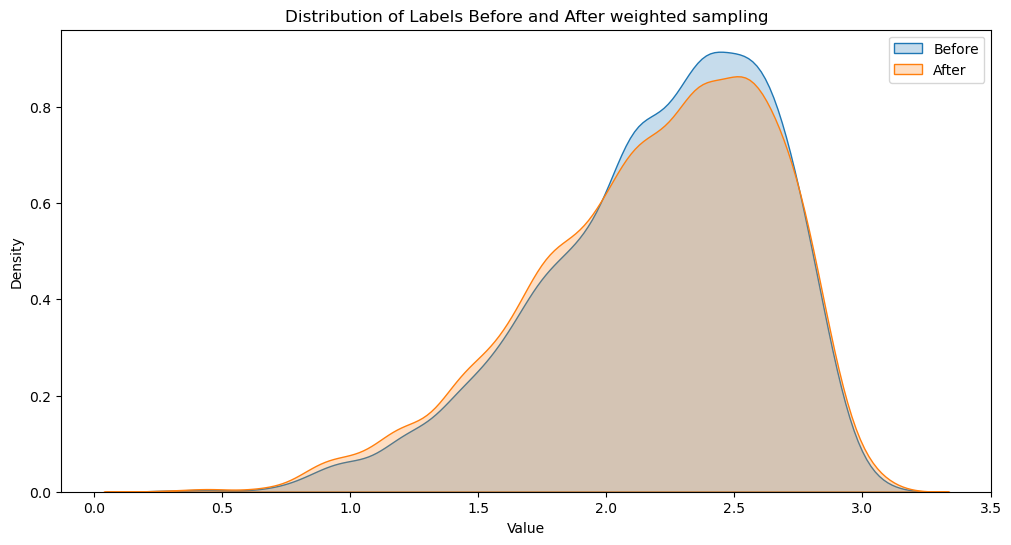

In [13]:
balanced_training_labels = []
for _, label in balanced_train_loader:
    balanced_training_labels.extend(label.numpy())
# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# KDE plot of True Labels
sns.kdeplot(training_labels, label='Before', shade=True)

# KDE plot of Predictions
sns.kdeplot(balanced_training_labels, label='After', shade=True)

# Plot formatting
plt.title('Distribution of Labels Before and After weighted sampling')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()

# Experiment 7

In [14]:
ex = 'ex_7'

dense_weight_model = DenseWeight(0.5)
dense_weight_model.fit(training_labels)

balanced_train_loader = create_dataloader(train_dataset, 64, dense_weight_model)

loss =  nn.MSELoss()
model = load_resnet_model('resnet50', num_classes=1)
optimizer = optim.Adam(model.parameters(), LR)

train_model(model, loss, optimizer, [balanced_train_loader], [val_loader], device, ex, epochs=EPOCH)

/opt/conda/envs/pytorch/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/envs/pytorch/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/30, Train Loss: 0.3414, Train R2: -0.3914, Train weighted MAE: 1.1538,Val Loss: 0.1159, Val R2: 0.4260, Val weighted MAE: 0.9943
Model saved as ex_7/checkpoint_epoch_1.pth
Epoch 2/30, Train Loss: 0.1401, Train R2: 0.4228, Train weighted MAE: 0.9778,Val Loss: 0.1256, Val R2: 0.3780, Val weighted MAE: 0.9374
Epoch 3/30, Train Loss: 0.1249, Train R2: 0.4761, Train weighted MAE: 1.0265,Val Loss: 0.1300, Val R2: 0.3563, Val weighted MAE: 0.7816
Epoch 4/30, Train Loss: 0.1120, Train R2: 0.5383, Train weighted MAE: 1.0615,Val Loss: 0.1291, Val R2: 0.3608, Val weighted MAE: 1.1175
Epoch 5/30, Train Loss: 0.1037, Train R2: 0.5789, Train weighted MAE: 0.9470,Val Loss: 0.1084, Val R2: 0.4630, Val weighted MAE: 0.9516
Model saved as ex_7/checkpoint_epoch_5.pth
Epoch 6/30, Train Loss: 0.1047, Train R2: 0.5652, Train weighted MAE: 1.0337,Val Loss: 0.1065, Val R2: 0.4726, Val weighted MAE: 1.0585
Model saved as ex_7/checkpoint_epoch_6.pth
Epoch 7/30, Train Loss: 0.0927, Train R2: 0.6249, Trai

/tmp/ipykernel_12546/3627720.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(training_labels, label='Before', shade=True)
/tmp/ipykernel_12546/3627720.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(balanced_training_labels, label='After', shade=True)


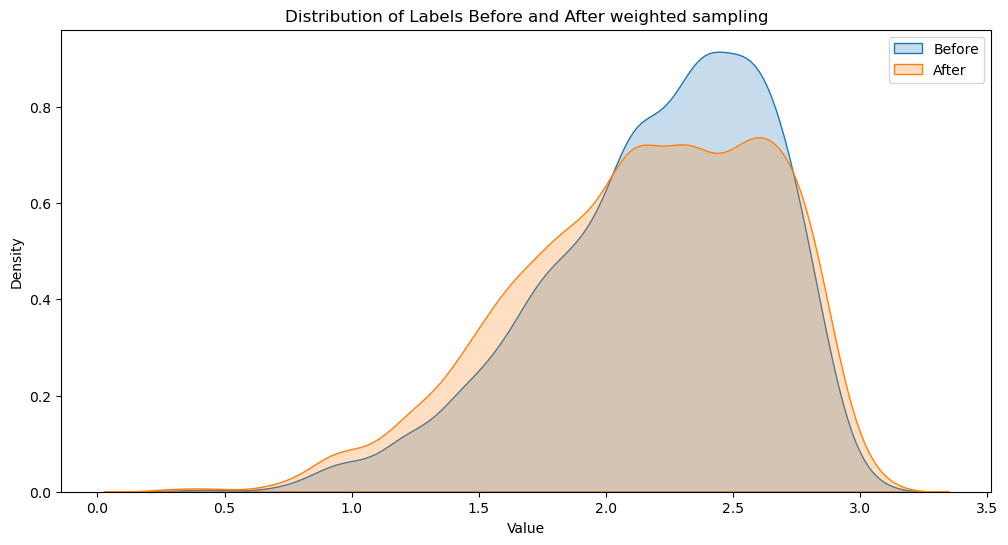

In [15]:
balanced_training_labels = []
for _, label in balanced_train_loader:
    balanced_training_labels.extend(label.numpy())
# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# KDE plot of True Labels
sns.kdeplot(training_labels, label='Before', shade=True)

# KDE plot of Predictions
sns.kdeplot(balanced_training_labels, label='After', shade=True)

# Plot formatting
plt.title('Distribution of Labels Before and After weighted sampling')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()